# 1. ljudfil

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import csv

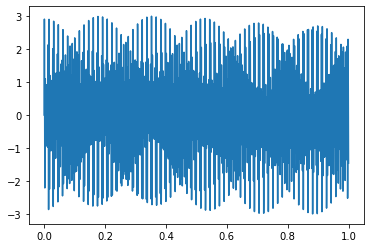

In [2]:


# Set the duration of the chord in seconds
duration = 1

# Set the sample rate (samples per second)
sample_rate = 44100

# Create a time vector with the appropriate length (in seconds)
time = np.linspace(0, duration, duration * sample_rate)

# Invidual waves (261.63... being the frequencies of C4, E4 and G4 in the fourth octave)
C4_wave = np.sin(2 * np.pi * 261.63 * time)
E4_wave = np.sin(2 * np.pi * 329.63 * time)
G4_wave = np.sin(2 * np.pi * 392.00 * time)

# The chord
chord = C4_wave + E4_wave + G4_wave

# .wav file
write('c_chord.wav', sample_rate, chord)

# export it to csv file
with open("chord.csv", "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Time", "Waveform"])
    for i in range(len(time)):
        csvwriter.writerow([time[i], chord[i]])


# Plot 
plt.plot(time, chord)
plt.show()


# 2. Pokemon

In [3]:
# imports
from PIL import Image

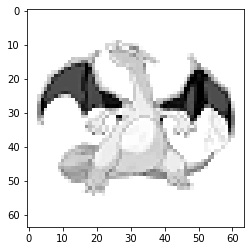

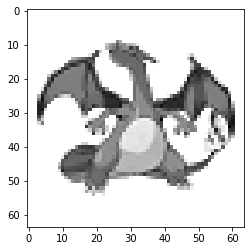

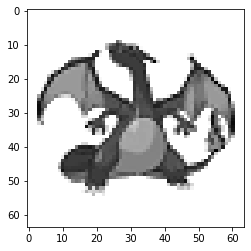

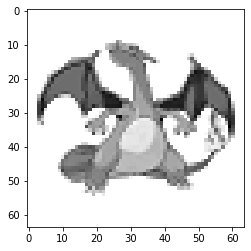

In [16]:
# image
image = np.array(Image.open('charizard.png'))

# getting the channels
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]


# grayed channels
gray_red = 0.2989 * R
gray_green = 0.5870 * G
gray_blue = 0.1140 * B

# grayed image, all channels combined
gray_image = gray_red + gray_green + gray_blue

# dispay images (grayed channels separetly)
plt.imshow(gray_red, cmap='gray')
plt.show()

plt.imshow(gray_green, cmap='gray')
plt.show()

plt.imshow(gray_blue, cmap='gray')
plt.show()

# All channels combined, 
plt.imshow(gray_image, cmap='gray')
plt.show()

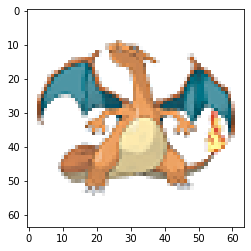

In [5]:
# image with all channels combined
all_image = np.stack([R,G,B], axis=2)

plt.imshow(all_image)
plt.show()

# 3. Fabio


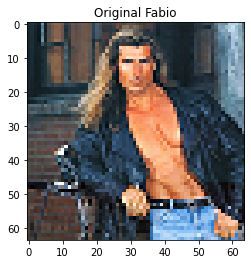

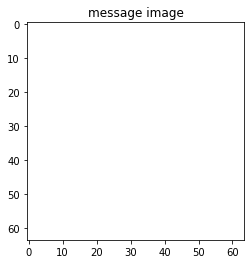

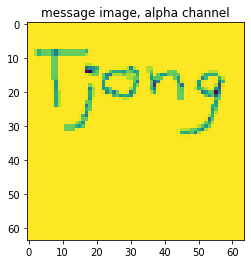

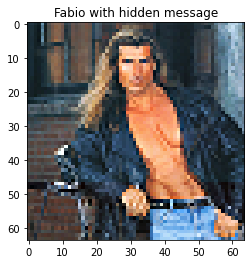

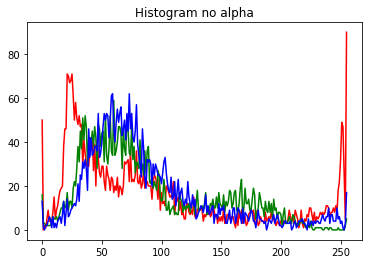

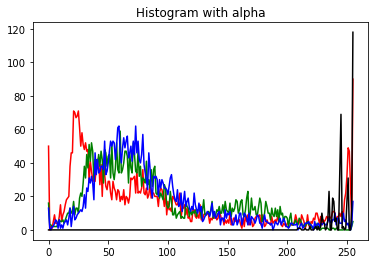

In [44]:
# Load images
img = Image.open('fabio64.png')
hidden_img = Image.open('alphapic.png')

# Original fabio show
plt.title("Original Fabio")
plt.imshow(img)
plt.show()


# to numpy arrays
img_array = np.array(img)
hidden_img_array = np.array(hidden_img)

# alpha channel from the hidden image
alpha = hidden_img_array[:,:,3]

#showing all the images variants etc...
plt.title("message image")
plt.imshow(hidden_img)
plt.show()

plt.title("message image, alpha channel")
plt.imshow(alpha)
plt.show()


# set the alpha channel of the original to the new channel from the hidden image
img_array[:,:,3] = alpha

# convert back to image
img = Image.fromarray(img_array)

# extracting the channels for histograms
rgb = img_array[:,:,:3]
rgba = img_array[:,:,:4]

# Show the image with the hidden message
plt.title("Fabio with hidden message")
plt.imshow(img)
plt.show()

# Histograms (Alphas range is to 254, if its to 255 you will barely see RGB on the second histogram)
plt.title("Histogram no alpha")
plt.plot(np.histogram(rgb[:,:,0].flatten(), bins=256, range=(0,255))[0], color='red')
plt.plot(np.histogram(rgb[:,:,1].flatten(), bins=256, range=(0,255))[0], color='green')
plt.plot(np.histogram(rgb[:,:,2].flatten(), bins=256, range=(0,255))[0], color='blue')
plt.show()

plt.title("Histogram with alpha")
plt.plot(np.histogram(rgba[:,:,0].flatten(), bins=256, range=(0,255))[0], color='red')
plt.plot(np.histogram(rgba[:,:,1].flatten(), bins=256, range=(0,255))[0], color='green')
plt.plot(np.histogram(rgba[:,:,2].flatten(), bins=256, range=(0,255))[0], color='blue')
plt.plot(np.histogram(rgba[:,:,3].flatten(), bins=256, range=(0,254))[0], color='black')
plt.show()